### Custom functions:
- algorithms:
    - policy evaluation algorithm (dynamic programming)
    - policy evaluation algorithm ($TD(0)$)
- simulations:
    - mdp step
- calculations:
    - return
- display:
    - displaying gridworld
    - displaying deterministic policy

In [2]:
def policy_evaluation_dp( policy, mdp, gamma, eps ) :
    v = np.zeros( N )            # initial state-value function
    delta = 1
    while delta > eps :
        vn = np.zeros( N )       # temporary state-value function 
        for s in range(len(v)) : # sweep through states
            #--- one step lookahead
            # step probabilities * ( reward + gamma * succesor_state old value )
            osl = np.multiply( policy[s], mdp[range(4),1,s] + v[mdp[range(4),0,s].astype(int)] * gamma )
            vn[s] = np.sum(osl)
        delta = np.max(v-vn)     # calculate change of value function
        v = vn                   # simultaneous update
    return v  

In [123]:
def policy_evalation_td0( policy, mdp, gamma, alpha, N_episode ) :
    # policy      – policy to evaluate
    # mdp, gamma  – problem statement
    # alpha       – (param) learning rate
    # N_episode   – (param) number of sampled episodes
    v = np.zeros(N)                                              # initial state-value function
    for episode in range(N_episode) :
        s_t = random.randint(0,N-1)                                  # starting state
        while s_t != 2 :                                             # sample whole episode
            s_t1, r_t1 = mdp_step( s_t, mdp, policy )
            #--- TD update = old estimate + learning rate * prediction error
            v[s_t] = v[s_t] + alpha * ( r_t1 + gamma * v[s_t1] - v[s_t] )
            s_t = s_t1
    return v

In [90]:
def mdp_step( s_t, mdp, policy ) :
    #--- move according to policy
    move = np.random.choice( 4, 1, p=policy[s_t] )  
    s_t1 = int(mdp[move,0,s_t])  # succesor state
    r_t1 = mdp[move,1,s_t]       # immediate reward
    return ( s_t1, r_t1[0] )

In [4]:
def calc_return( history, gamma ) :
    rtrn = 0
    for t in range(1,history.shape[0]) : 
        rtrn = rtrn + history[t,1] * ( gamma ** (t-1) )
    return rtrn

In [5]:
def show_matrix( A ) :
    row = A.shape[0]
    col = A.shape[1]
    #--- create plot
    tb = plt.table( cellText=A, loc=(0,0), cellLoc='center' )
    tc = tb.properties()['child_artists']
    #--- adjustments
    for cell in tc: 
        cell.set_height(1.0/row)     # set height
        cell.set_width(1.0/col)      # set width
    ax = plt.gca()
    ax.set_xticks([])                # hide ticks
    ax.set_yticks([])
    #--- draw 
    plt.show()

In [6]:
def show_policy( policy ) :
    #--- define arrows
    arrows = ['←','→','↓','↑']
    policy_arrow = []
    for row in policy :
        policy_arrow.extend(arrows[np.nonzero(row)[0][0]])
    #--- list to array and reshape
    policy_arrow = np.asarray(policy_arrow)
    policy_arrow = policy_arrow.reshape([5,5])
    #--- display policy
    show_matrix(policy_arrow)

### Succesor states & rewards (gridworld dynamics)

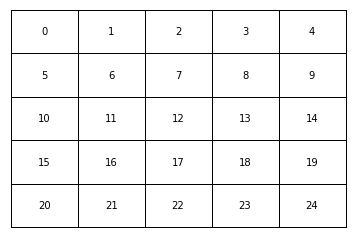

In [93]:
#--- import libraries
import numpy as np
import numpy.matlib as M
import random
import matplotlib.pyplot as plt
import pandas
#--- action = "left" or '0'
s_left = np.array([0,0,2,2,3,5,5,6,7,8,10,10,20,12,24,15,15,16,17,18,20,20,21,22,23])
r_left = (-1)*np.ones([25])
r_left[12] = 2  # good teleport
r_left[14] = -2 # bad teleport
r_left[2]  = 0  # terminal state
#--- action = "right" or '1'
s_right = np.array([1,2,2,4,4,6,7,8,9,9,20,12,24,14,14,16,17,18,19,19, 21,22,23,24,24])
r_right = (-1)*np.ones([25])
r_right[10] = 2 
r_right[12] = -2
r_right[2] = 0
#--- action = "down" or '2'
s_down = np.array([5,6,2,8,9,10,20,12,24,14,15,16,17,18,19,20,21,22,23,24,20,21,22,23,24])
r_down = (-1)*np.ones([25])
r_down[6] = 2
r_down[8] = -2
r_down[2] = 0
#--- action = "up" or '3'
s_up = np.array([0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,20,12,24,14,15,16,17,18,19])
r_up = (-1)*np.ones([25])
r_up[16] = 2
r_up[18] = -2
r_up[2] = 0
#--- concatenate succesor states and rewards vector into mdp 3-D array
mdp = np.stack( ( np.vstack(( s_left, r_left )), np.vstack(( s_right, r_right )),
                  np.vstack(( s_down, r_down )), np.vstack(( s_up   , r_up    )) ), axis=0 )
#--- show gridworld
N = 25      # number of states
N_grid = 5  # grid size
gamma = 0.9 # discount factor
states = np.arange(N)
show_matrix(np.reshape(states,[N_grid,N_grid]))

### Algorithm: policy iteration

Starting iteration: 1


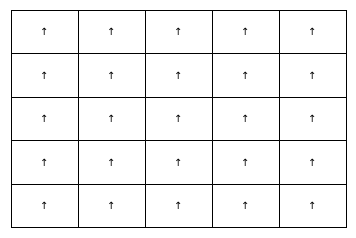

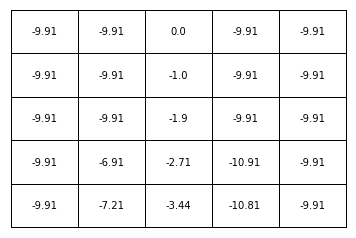

Starting iteration: 2


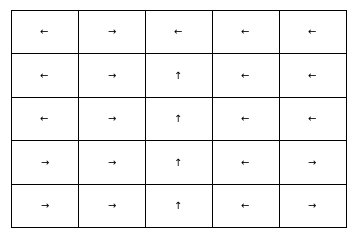

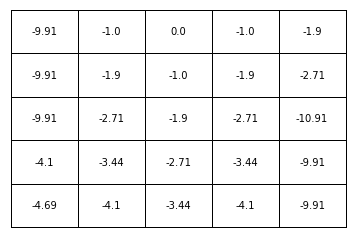

Starting iteration: 3


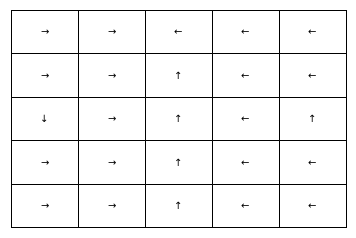

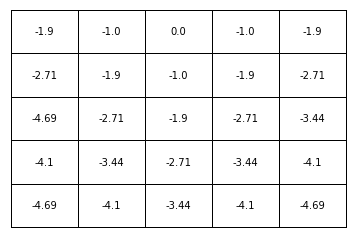

Starting iteration: 4


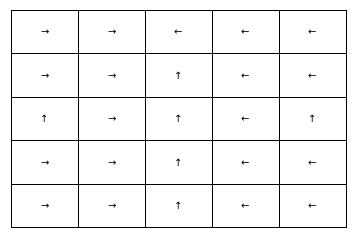

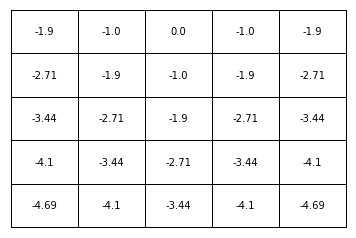

In [88]:
#--- initialization
policy = np.hstack( ( np.zeros([N,3]), np.ones([N,1]) ) )    # initial policy (always go up)
v = np.zeros( N )                                            # initial state-value function

#--- algorithm
policy_stable = False
iter = 0
while policy_stable == False :
    iter = iter + 1                                          # iteration counter
    print('Iteration: ' + str(iter))
    show_policy(policy)
    #--- policy evaluation
    vn = policy_evaluation( policy, 0.9, 0.01, mdp )
    show_matrix(vn.round(decimals=2).reshape([5,5]))
    #--- create new greedy policy 
    policyn = np.zeros([N,4])                                # new policy (possibly improved) 
    for s in range(len(v)) :                                 # choose greedy action
        policyn[s,np.argmax(vn[mdp[range(4),0,s].astype(int)])] = 1
    #--- find if stable
    policy_stable = np.array_equal(policy,policyn)
    #--- replace policy
    policy = policyn

### Algorithm: policy evaluation (dynamic programming)

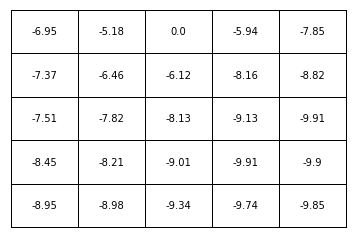

In [87]:
#--- settings (unirandom policy to evaluate)
policy = M.repmat( np.array([0.25,0.25,0.25,0.25]), N, 1 )
eps = 0.001                  # convergence condition

#--- algorithm ----------------------------------------------------------------------------------------------------------
v = policy_evaluation_dp( policy, mdp, gamma, eps  )
        
#--- show result --------------------------------------------------------------------------------------------------------
v = np.around(v,decimals=2)   
show_matrix(v.reshape([5,5]))

### Algorithm: $TD(0)$ policy evaluation

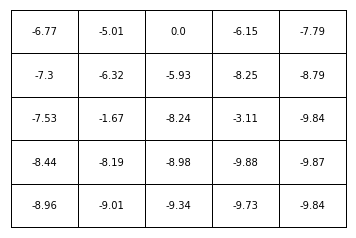

In [126]:
#--- settings
policy = M.repmat( np.array([0.25,0.25,0.25,0.25]), N, 1 )   # unirandom policy
N_episode = 1000                                             # number of sampled episodes
alpha = .01                                                  # learning rate

#--- algorithm
v = policy_evalation_td0( policy, mdp, gamma, alpha, N_episode )

#--- show result
show_matrix(v.reshape([5,5]).round(decimals=2))

### Run example MDP using unirandom policy $\pi$

In [11]:
#--- initial state
cur_state = 24
#--- simulate MDP
history = np.array([cur_state, 0])
while cur_state != 2 :
    cur_state, cur_reward = mdp_step( cur_state, mdp )
    history = np.vstack( ( history, np.array([cur_state, cur_reward]) )  )
#--- display history and calculated return
# print(calc_return( history, gamma=0.9 ))
# print(history)